In [1]:
%load_ext autoreload
%autoreload 2

import os, pickle, random, sbmtm
# import seaborn as sns; sns.set(style="white", color_codes=True) # is not installed on system, just folder in this directory
import numpy as np
import pandas as pd
from sbmtm import sbmtm
import matplotlib.pyplot as plt

%matplotlib inline

/home/martin/anaconda3/envs/graph-tool/lib/python3.6/site-packages/graph_tool/draw/cairo_draw.py:1499: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [2]:
path_read = 'cleaned_posts/'
fname_read = '10149142-the-family-fang.json'
filename = os.path.join(path_read,fname_read)
print(filename)

cleaned_posts/10149142-the-family-fang.json


In [3]:
with open(filename,"r",encoding="utf8") as f:
    df = pd.DataFrame(pd.read_json(f)).T

In [4]:
df.head()

,delta,likes,name,raw_text,text,word_count
1,-338,0,ehicifj.json,i had so much fun reading this book i actuall...,"[fun, read, book, actually, finish, book, disn...",54
2,152,0,acfajgi.json,i avoided this book for the longest time beca...,"[avoid, book, long, time, book, description, p...",41
3,444,0,fdccaeb.json,a rare contemporary novel that understands tha...,"[rare, contemporary, novel, understand, call, ...",41
4,-195,1 like,ecaaeab.json,what an a a mazing debut compelling and one o...,"[debut, compelling, kind, story, pair, perform...",60
5,-303,0,hebfff.json,this absolutely lives up to the hype great cha...,"[absolutely, live, hype, great, character, fla...",35


In [5]:
m_min = 100 ## minimum text length
df = df[df['word_count']>=m_min]

In [6]:
df.head()

,delta,likes,name,raw_text,text,word_count
29,263,0,ieaedc.json,so kevin wilson writes really well simple but ...,"[kevin, wilson, write, simple, lovely, prose, ...",106
40,-394,2 likes,ceecba.json,a friend brought me this book and two others w...,"[friend, bring, book, home, work, sick, dog, r...",145
41,356,0,aabbgjh.json,you could look at this book as an examination...,"[look, book, examination, book, mean, artist, ...",149
50,-249,1 like,fffcgf.json,what constitutes art for caleb and camille fan...,"[constitute, art, caleb, camille, fang, involv...",149
53,123,0,eefgbfd.json,have you ever realised how much a person’s pe...,"[realise, person, ’s, personality, affect, per...",190


In [7]:
list_texts = list(df['text'])
list_titles = list(df.index)
# list_titles

[29,
 40,
 41,
 50,
 53,
 62,
 77,
 90,
 106,
 112,
 122,
 125,
 128,
 144,
 149,
 155,
 159,
 173,
 174,
 199,
 215,
 216,
 231,
 238,
 246,
 263,
 264,
 267,
 269,
 273,
 279,
 289,
 293,
 298,
 299,
 300,
 301,
 302,
 313,
 319,
 324,
 337,
 341,
 342,
 370,
 372,
 378,
 390,
 400,
 401,
 403,
 409,
 411,
 426,
 436,
 440,
 445,
 453,
 476,
 487,
 505,
 506,
 509,
 514,
 518,
 528,
 534,
 536,
 555,
 560,
 562,
 587,
 590,
 593,
 594,
 603,
 633,
 654,
 658,
 660,
 662,
 673,
 683,
 695,
 705,
 709,
 719,
 721,
 727,
 729,
 730,
 735,
 764,
 765,
 767,
 781,
 800,
 804,
 816,
 823,
 826,
 827,
 863,
 864,
 868,
 874,
 877,
 881,
 890,
 900,
 908,
 920,
 933,
 957,
 963,
 965,
 977,
 987,
 992,
 994,
 997,
 998,
 1003,
 1011,
 1013,
 1015,
 1016,
 1020,
 1021,
 1026,
 1028,
 1033,
 1034,
 1036,
 1039,
 1044,
 1053,
 1069,
 1070,
 1088,
 1098,
 1112,
 1113,
 1128,
 1129,
 1137,
 1151,
 1153,
 1170,
 1171,
 1178,
 1182,
 1204,
 1206,
 1207,
 1212,
 1216,
 1227,
 1246,
 1252,
 1255,
 12

In [8]:
len(list_texts)

234

In [9]:
list_dt = list(df['delta'])

Text(0,0.5,'# books lenth >= m')

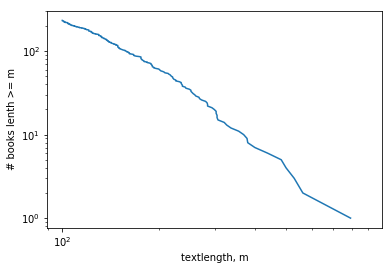

In [10]:
list_m = [len(text) for text in list_texts]
N = len(list_texts)
x = np.sort(list_m)
y = (np.arange(N)+1)

plt.plot(x,N-y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('textlength, m')
plt.ylabel('# books lenth >= m')

In [20]:
model = sbmtm()

In [21]:
model.make_graph(list_texts,documents = list_titles)

In [22]:
model.fit()

In [24]:
model.topics(l=1)

{0: [('fang', 0.027470274702747027),
  ('parent', 0.027060270602706028),
  ('child', 0.026240262402624025),
  ('buster', 0.025420254202542025),
  ('family', 0.025283586169195026),
  ('annie', 0.024873582069154025),
  ('performance', 0.022550225502255022),
  ('caleb', 0.02077354106874402),
  ('camille', 0.02022686893535602),
  ('artist', 0.020090200902009019)],
 1: [('art', 0.016066136328185932),
  ('book', 0.015286226797691468),
  ('not', 0.012790516300109188),
  ('read', 0.011542661051318048),
  ('like', 0.011230697239120261),
  ('story', 0.0104507877086258),
  ('find', 0.0096708781781313369),
  ('think', 0.0092809234128841053),
  ('love', 0.0091249415067852137),
  ('character', 0.0089689596006863204)],
 2: [('strange', 0.048984468339307051),
  ('creative', 0.022700119474313024),
  ('worth', 0.021505376344086023),
  ('second', 0.021505376344086023),
  ('word', 0.021505376344086023),
  ('beautiful', 0.020310633213859019),
  ('pain', 0.020310633213859019),
  ('happening', 0.020310633213

Text(0,0.5,'fraction of posts in doc-group')

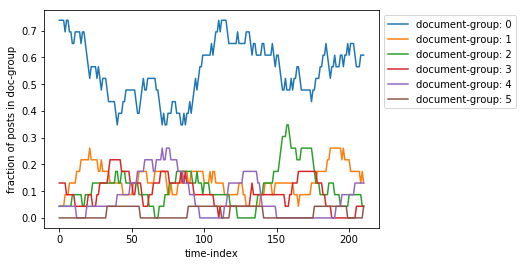

In [28]:
## group membership of doc-, and word-nodes
p_td_d,p_tw_w = model.group_membership(l=1)

D = model.get_D() ## number of documents
B_d = len(p_td_d[:,0]) ## number of doc-groups
B_w = len(p_tw_w[:,0]) ## number of word-groups

## sort docs according to time-stamp
indsort = np.argsort(list_dt)
p_td_d_sort = p_td_d[:,indsort]

## measure fraction of docs in each doc-group in a running window of length s
s = int(D/10) ## running window with s posts
arr_t_s = np.zeros((B_d,D-s))
for i in range(D-s):
    arr_t_s[:,i] = np.mean(p_td_d_sort[:,i:i+s],axis=1)

## plot
for t_w in range(B_d):
    plt.plot(arr_t_s[t_w,:],label='document-group: %s'%(t_w))
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('time-index')
plt.ylabel('fraction of posts in doc-group')

In [29]:
## fraction of tokens from doc-group td to word-group tw
p_td_tw = model.group_to_group_mixture(l=1)
np.shape(p_td_tw)
plt.imshow(p_td_tw,aspect='auto')

6


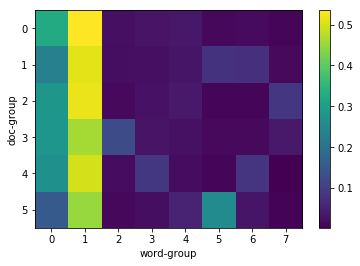

In [36]:
## conditional probability p(tw | td)
p_tw_cond_td = p_td_tw.T/np.sum(p_td_tw,axis=1)[np.newaxis,:]#[:,np.newaxis]
plt.imshow(p_tw_cond_td.T,aspect='auto')
plt.ylabel('doc-group')
plt.xlabel('word-group')
plt.colorbar()

In [37]:
## How much does each document group load on patricular topics?
result = model.get_groups(l=1)

In [38]:
p_tw_d = result['p_tw_d']

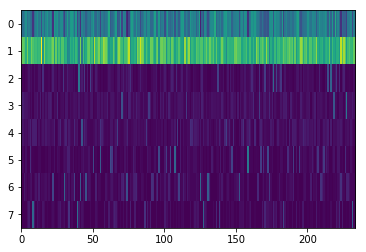

In [39]:
plt.imshow(p_tw_d,aspect='auto')

In [40]:
## how much each word-topic loads into each document
D = model.get_D()
B_w = len(p_tw_w[:,0])
p_tw_d = np.zeros(( B_w,D ))
for i in range(D):
    p_tw_d[:,i] = [ h[1] for h in model.topicdist(i,l=1) ]
    
indsort = np.argsort(list_dt)
p_tw_d = p_tw_d[:,indsort]

# indsort = np.argsort(list_dt)
# plt.imshow(p_td_w,aspect='auto',vmin=0,vmax=1)
# plt.imshow(p_td_w,aspect='auto',vmin=0,vmax=1)

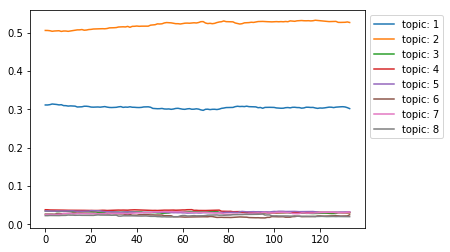

In [41]:
s = 100 ## running window with s posts
arr_t_s = np.zeros((B_w,D-s))
for i in range(D-s):
    arr_t_s[:,i] = np.mean(p_tw_d[:,i:i+s],axis=1)

for t_w in range(B_w):
    plt.plot(arr_t_s[t_w,:],label='topic: %s'%(t_w+1))
plt.legend(bbox_to_anchor=(1,1))